<a href="https://colab.research.google.com/github/C4puto/Machine-Learning/blob/main/ViniciusCaputo_Classifica%C3%A7%C3%A3o_site.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação Binária



## Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## Pré-processamento de dados

### Importando e visualizando os dados

In [2]:
url = "https://raw.githubusercontent.com/C4puto/Machine-Learning/main/projects.csv"
dados = pd.read_csv(url)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Convertendo valores de classe

In [3]:
troca = {0:1, 1:0}
dados['unfinished'] = dados['unfinished'].map(troca)


### Renomeando colunas

In [4]:
mapa = {
    'unfinished': 'finalizado',
    'expected_hours': 'horas_esperadas',
    'price': 'preço'
}

dados = dados.rename(columns=mapa)
dados.head()

,finalizado,horas_esperadas,preço
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170


### Gerando gráficos

<Axes: xlabel='horas_esperadas', ylabel='preço'>

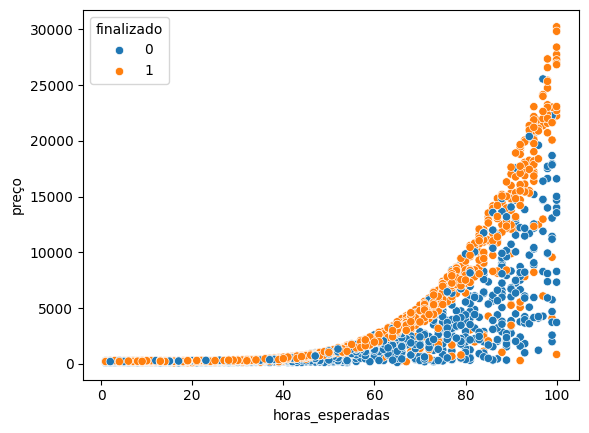

In [5]:
sns.scatterplot(x="horas_esperadas", y="preço", hue="finalizado", data=dados)

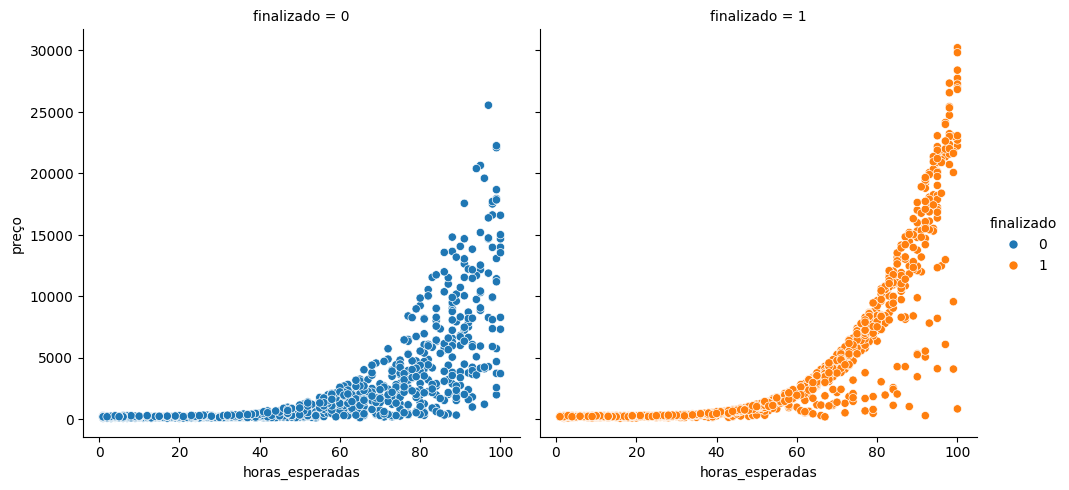

In [6]:
sns.relplot(x="horas_esperadas", y="preço", hue="finalizado", col="finalizado", data=dados)

### Verificando o balanceamento

In [7]:
dados.finalizado.value_counts()

finalizado
1    1134
0    1023
Name: count, dtype: int64

## Modelo classificador LinearSVC

### Separando dados de treino e teste

In [8]:
X = dados[['horas_esperadas','preço']]
y = dados['finalizado']

seed = 42
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=seed, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_X), len(test_X)))


Treinaremos com 1617 elementos e testaremos com 540 elementos


In [9]:
model = LinearSVC()
model.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [10]:
result = model.predict(test_X)
accuracy = model.score(test_X, test_y)
print("Acuracia: %.2f%%" % (accuracy * 100))

Acuracia: 47.41%


### Modelo dummy


In [11]:
dummy = DummyClassifier()  # Cria modelo
dummy.fit(train_X, train_y)  # Treina modelo
result = dummy.score(test_X, test_y)  # Testa modelo
print("A acurácia do dummy foi %.2f%%" % (result * 100))

A acurácia do dummy foi 52.59%


### Gerando gráficos com dados de teste

<Axes: xlabel='horas_esperadas', ylabel='preço'>

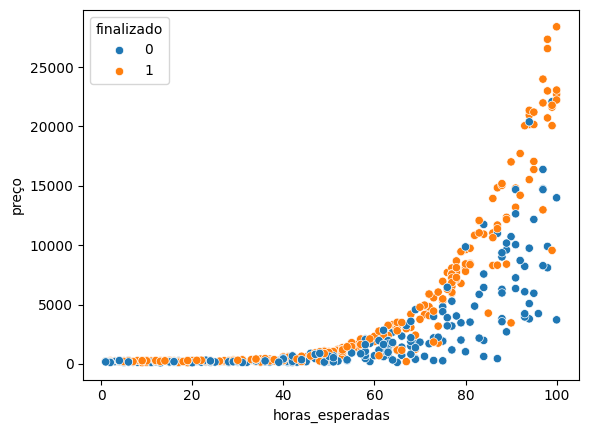

In [12]:
sns.scatterplot(x="horas_esperadas", y="preço", hue=test_y, data=test_X)

In [13]:
x_min = test_X.horas_esperadas.min()
x_max = test_X.horas_esperadas.max()
y_min = test_X.preço.min()
y_max = test_X.preço.max()
print(x_min, x_max,y_min,y_max)

1 100 100 28398


In [14]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [15]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

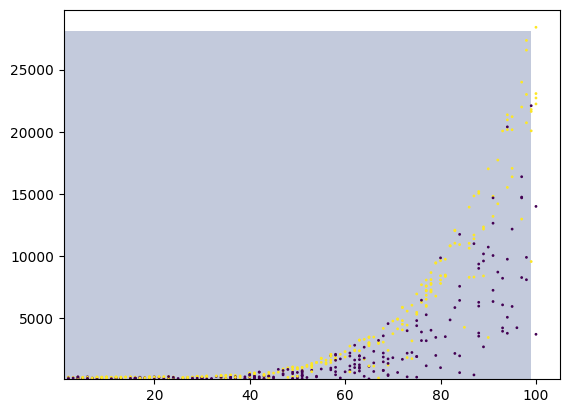

In [16]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_X.horas_esperadas, test_X.preço, c=test_y, s=1)

# DECISION BOUNDARY (Curva de Decisão)

## Modelo classificador SVC


In [17]:
model_2 = SVC(gamma='auto')
model_2.fit(train_X, train_y)

SVC(gamma='auto')

In [18]:
result_2 = model_2.predict(test_X)
accuracy_2 = model_2.score(test_X, test_y)
print("Acuracia: %.2f%%" % (accuracy_2 * 100))

Acuracia: 57.59%


### Gerando gráficos

In [19]:
Z_2 = model_2.predict(pontos)
Z_2 = Z_2.reshape(xx.shape)
Z_2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

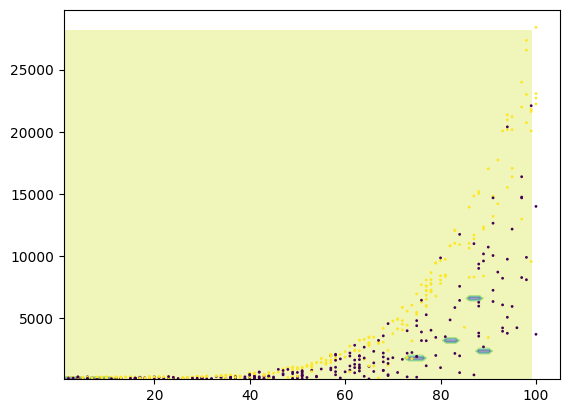

In [20]:
plt.contourf(xx, yy, Z_2, alpha=0.3)
plt.scatter(test_X.horas_esperadas, test_X.preço, c=test_y, s=1)

# DECISION BOUNDARY (Curva de Decisão)

## StandartScaler

In [21]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X_normalized = scaler.transform(train_X)
test_X_normalized = scaler.transform(test_X)


In [22]:
model_3 = SVC(gamma='auto')
model_3.fit(train_X_normalized, train_y)

SVC(gamma='auto')

In [23]:
result_3 = model_3.predict(test_X_normalized)
accuracy_3 = model_3.score(test_X_normalized, test_y)
print("Acuracia: %.2f%%" % (accuracy_3 * 100))

Acuracia: 67.78%


### Gerando gráfico

In [24]:
data_x = test_X_normalized[:,0]
data_y = test_X_normalized[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)

-1.7228783460049835 1.7421642976393676 -0.5943891464923722 5.098421725962724


In [25]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[-1.72287835, -0.59438915],
       [-1.68822792, -0.59438915],
       [-1.65357749, -0.59438915],
       ...,
       [ 1.63821302,  5.04149362],
       [ 1.67286344,  5.04149362],
       [ 1.70751387,  5.04149362]])

In [26]:
Z_3 = model_3.predict(pontos)
Z_3 = Z_3.reshape(xx.shape)
Z_3

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

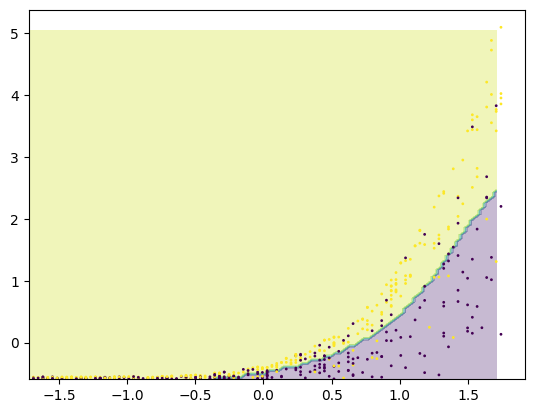

In [27]:
plt.contourf(xx, yy, Z_3, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=1)

# DECISION BOUNDARY (Curva de Decisão)

## Exemplos de aplicação

In [28]:
#poucas horas, preço baixo | algumas horas, preço alto | muitas horas, preço médio

exemplos = [[90,300],[70,10000],[70,5000]]
result_exemplo = model.predict(exemplos)
print(result_exemplo)

[0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [29]:
exemplos_2 = [[90,300],[70,10000],[70,5000]]
result_exemplo_2 = model_2.predict(exemplos_2)
print(result_exemplo_2)

[1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [30]:
exemplos_3 = [[90,300],[70,10000],[70,5000]]
result_exemplo_3 = model_3.predict(exemplos_3)
print(result_exemplo_3)

[1 1 1]
